<a href="https://colab.research.google.com/github/thitiphon01/all-project/blob/main/quantstat/Portfolio_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance --upgrade --no-cache-dir
!pip install quantstats --upgrade --no-cache-dir
!pip install tabulate

In [2]:
%matplotlib inline
import quantstats as qs
import pandas as pd
import yfinance as yf
import numpy as np

from datetime import datetime
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

import logging
logging.getLogger('matplotlib.font_manager').setLevel(level=logging.CRITICAL)

In [3]:
# Download ข้อมูลราคาสินทรัพย์ แบบกำหนดช่วงเวลา
tickers = yf.Ticker('GLD')
end_date = datetime.now().strftime('%Y-%m-%d')
df = tickers.history(start='2023-01-01',end=end_date)

df.tail(10)

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
Date,,,,,,,,
2024-02-22 00:00:00-05:00,187.559998,187.639999,187.050003,187.559998,4550800,0.0,0.0,0.0
2024-02-23 00:00:00-05:00,187.559998,189.179993,187.460007,188.619995,6827300,0.0,0.0,0.0
2024-02-26 00:00:00-05:00,187.789993,188.360001,187.529999,188.199997,4491900,0.0,0.0,0.0
2024-02-27 00:00:00-05:00,188.580002,188.720001,187.880005,188.000000,5165400,0.0,0.0,0.0
2024-02-28 00:00:00-05:00,188.339996,188.520004,188.029999,188.339996,2824100,0.0,0.0,0.0
2024-02-29 00:00:00-05:00,189.639999,189.919998,189.229996,189.309998,6848600,0.0,0.0,0.0
2024-03-01 00:00:00-05:00,190.270004,193.399994,189.440002,192.889999,13404800,0.0,0.0,0.0
2024-03-04 00:00:00-05:00,194.149994,196.330002,193.880005,196.009995,12216300,0.0,0.0,0.0
2024-03-05 00:00:00-05:00,197.440002,198.139999,196.649994,197.190002,9672200,0.0,0.0,0.0


In [4]:
df['Daily Return'] = df['Close'].pct_change().round(4)
df.tail(10)

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains,Daily Return
Date,,,,,,,,,
2024-02-22 00:00:00-05:00,187.559998,187.639999,187.050003,187.559998,4550800,0.0,0.0,0.0,0.0004
2024-02-23 00:00:00-05:00,187.559998,189.179993,187.460007,188.619995,6827300,0.0,0.0,0.0,0.0057
2024-02-26 00:00:00-05:00,187.789993,188.360001,187.529999,188.199997,4491900,0.0,0.0,0.0,-0.0022
2024-02-27 00:00:00-05:00,188.580002,188.720001,187.880005,188.000000,5165400,0.0,0.0,0.0,-0.0011
2024-02-28 00:00:00-05:00,188.339996,188.520004,188.029999,188.339996,2824100,0.0,0.0,0.0,0.0018
2024-02-29 00:00:00-05:00,189.639999,189.919998,189.229996,189.309998,6848600,0.0,0.0,0.0,0.0052
2024-03-01 00:00:00-05:00,190.270004,193.399994,189.440002,192.889999,13404800,0.0,0.0,0.0,0.0189
2024-03-04 00:00:00-05:00,194.149994,196.330002,193.880005,196.009995,12216300,0.0,0.0,0.0,0.0162
2024-03-05 00:00:00-05:00,197.440002,198.139999,196.649994,197.190002,9672200,0.0,0.0,0.0,0.0060


In [5]:
iasset = df['Daily Return'].dropna()

In [6]:
qs.extend_pandas()

In [7]:
[f for f in dir(qs.stats) if f[0] != '_']

['adjusted_sortino',
 'autocorr_penalty',
 'avg_loss',
 'avg_return',
 'avg_win',
 'best',
 'cagr',
 'calmar',
 'common_sense_ratio',
 'comp',
 'compare',
 'compsum',
 'conditional_value_at_risk',
 'consecutive_losses',
 'consecutive_wins',
 'cpc_index',
 'cvar',
 'distribution',
 'drawdown_details',
 'expected_return',
 'expected_shortfall',
 'exposure',
 'gain_to_pain_ratio',
 'geometric_mean',
 'ghpr',
 'greeks',
 'implied_volatility',
 'information_ratio',
 'kelly_criterion',
 'kurtosis',
 'max_drawdown',
 'monthly_returns',
 'omega',
 'outlier_loss_ratio',
 'outlier_win_ratio',
 'outliers',
 'payoff_ratio',
 'pct_rank',
 'probabilistic_adjusted_sortino_ratio',
 'probabilistic_ratio',
 'probabilistic_sharpe_ratio',
 'probabilistic_sortino_ratio',
 'profit_factor',
 'profit_ratio',
 'r2',
 'r_squared',
 'rar',
 'recovery_factor',
 'remove_outliers',
 'risk_of_ruin',
 'risk_return_ratio',
 'rolling_greeks',
 'rolling_sharpe',
 'rolling_sortino',
 'rolling_volatility',
 'ror',
 'seren

In [8]:
# show sharpe ratio
iasset.sharpe()

1.0532244057174056

In [9]:
 #expected_return
 iasset.expected_return()

0.000510466251352204

In [10]:
# 'value_at_risk'
iasset.value_at_risk()

-0.012939781001707912

## Performance report of asset prices

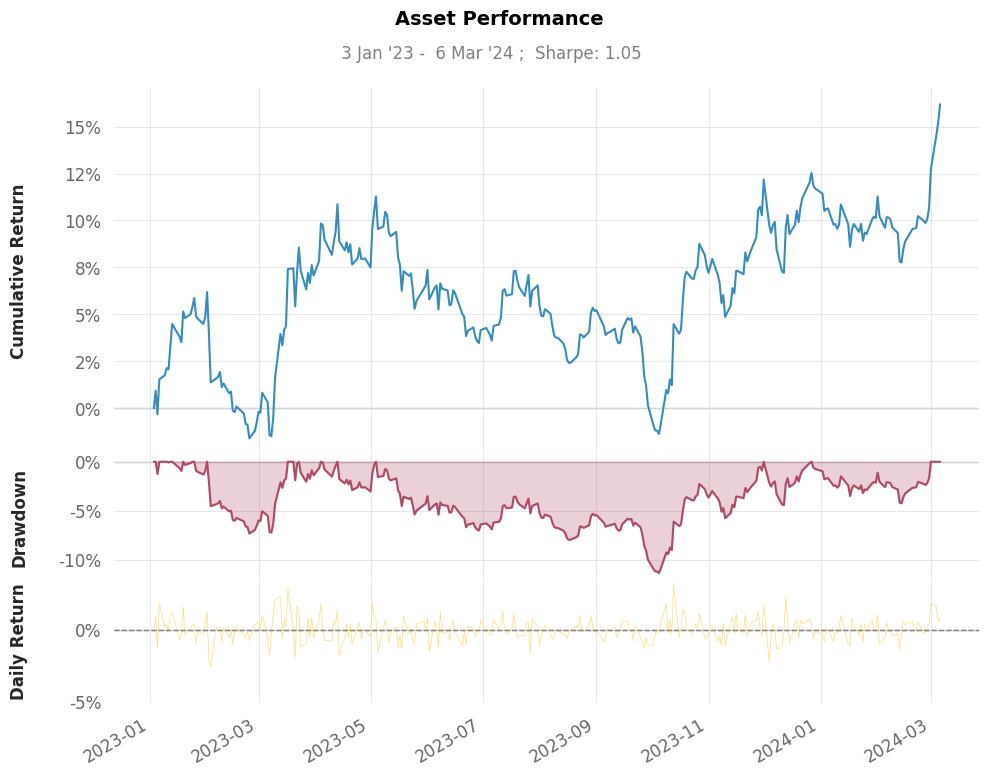

In [11]:
#qs.plots.snapshot
iasset.plot_snapshot(title='Asset Performance', show=True)

[Performance Metrics]

                           Strategy
-------------------------  ----------
Start Period               2023-01-04
End Period                 2024-03-06
Risk-Free Rate             0.0%
Time in Market             100.0%

Cumulative Return          16.19%
CAGR﹪                     9.26%

Sharpe                     1.05
Prob. Sharpe Ratio         87.45%
Smart Sharpe               1.04
Sortino                    1.64
Smart Sortino              1.61
Sortino/√2                 1.16
Smart Sortino/√2           1.14
Omega                      1.19

Max Drawdown               -11.36%
Longest DD Days            210
Volatility (ann.)          13.01%
Calmar                     0.81
Skew                       0.33
Kurtosis                   1.28

Expected Daily %           0.05%
Expected Monthly %         1.01%
Expected Yearly %          7.79%
Kelly Criterion            8.46%
Risk of Ruin               0.0%
Daily Value-at-Risk        -1.29%
Expected Shortfall (cVaR)  -1.29%

Max 

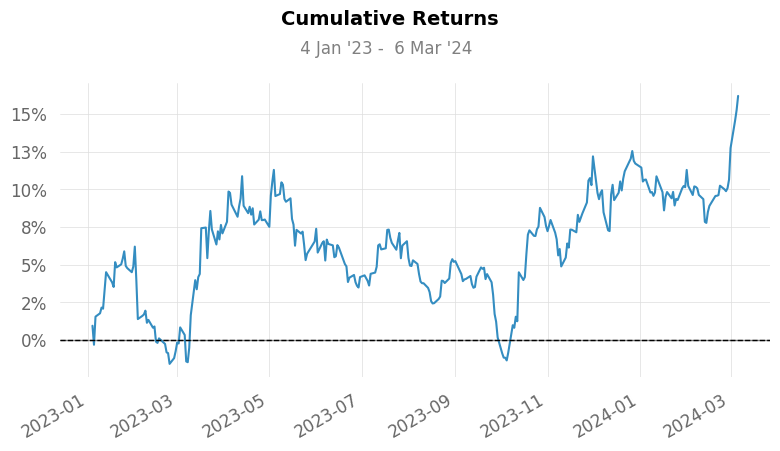

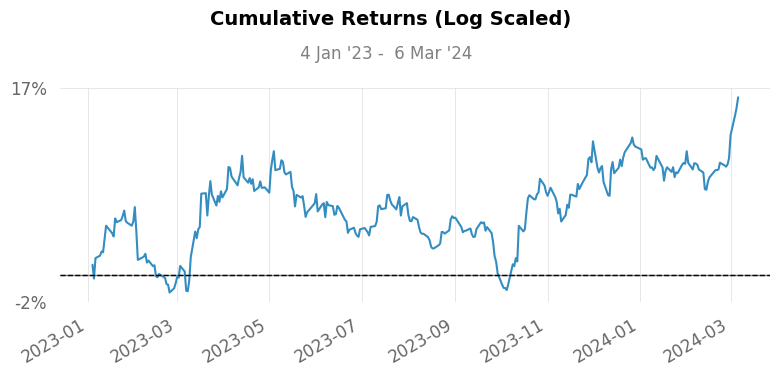

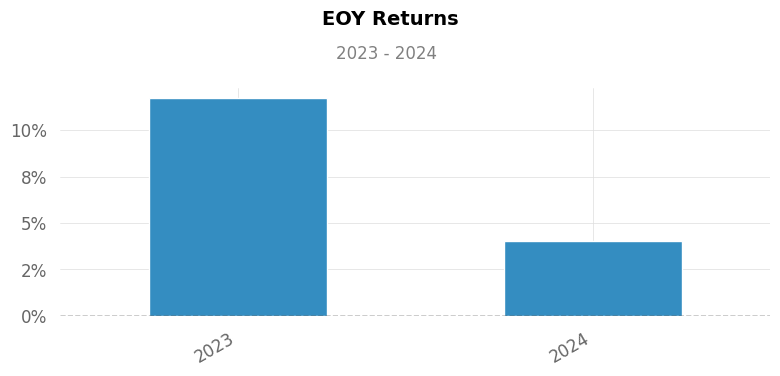

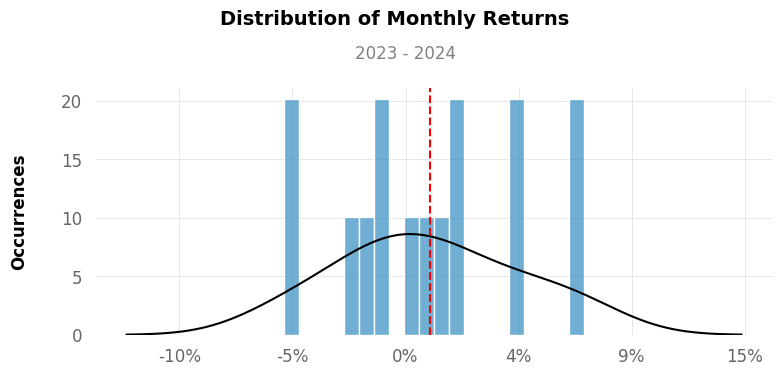

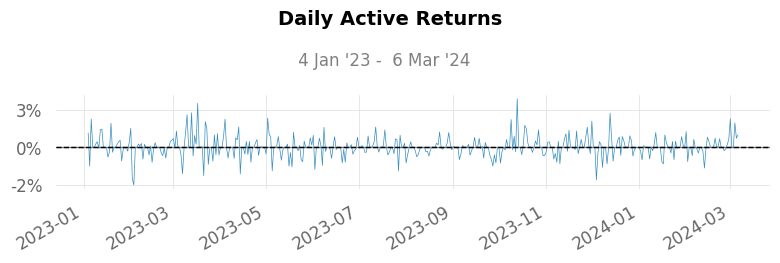

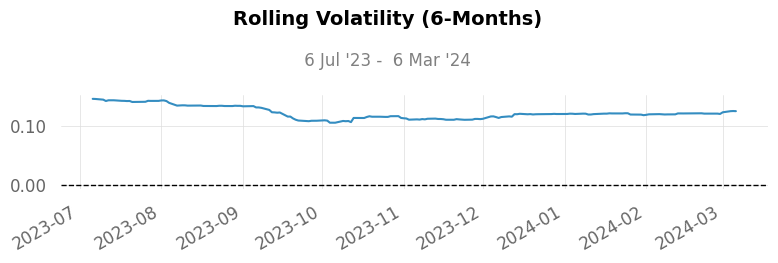

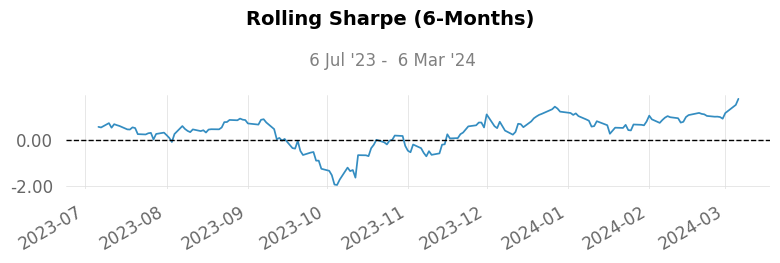

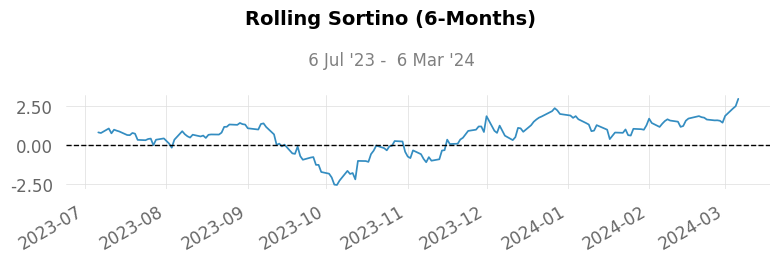

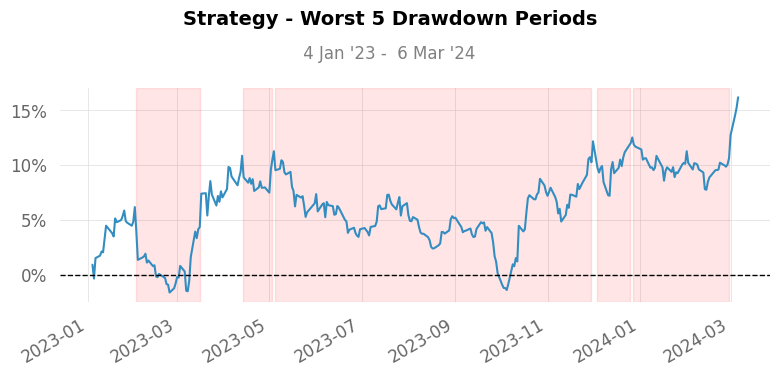

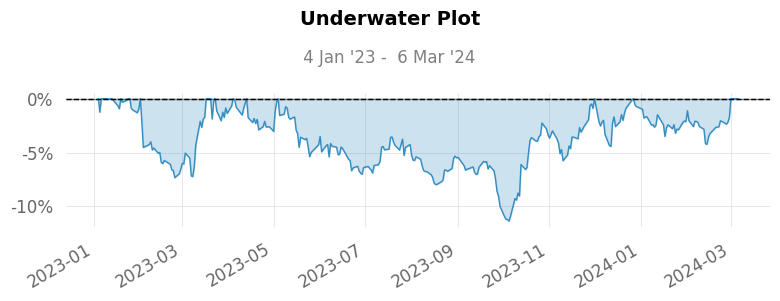

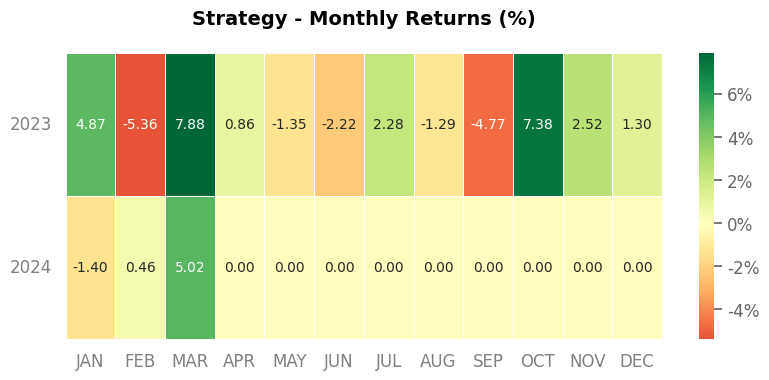

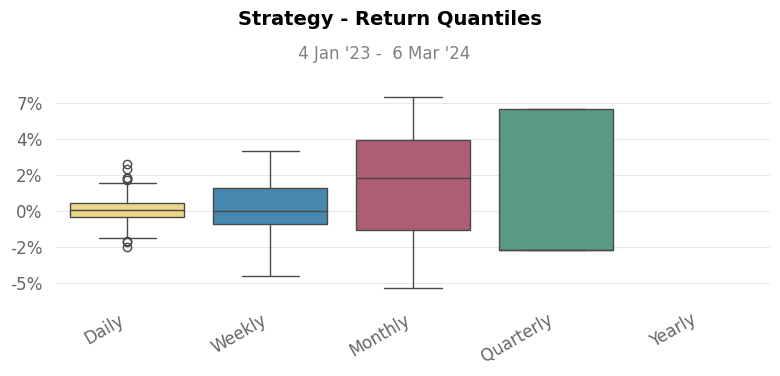

In [12]:
qs.reports.full(iasset)